### Import the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Load the datasets

In [2]:
train_file_path = 'train_data.csv'
train_df = pd.read_csv(train_file_path)

test_file_path = 'test_data.csv'
test_df = pd.read_csv(test_file_path)

### Exploratory Data Analysis

#### Display basic information about dataset

In [3]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

#### Display summary statistics

In [4]:
print(train_df.describe())

                 ID  Children count        Income           Age  \
count  2.916500e+04    29165.000000  2.916500e+04  29165.000000   
mean   5.078232e+06        0.430790  1.868904e+05 -15979.477490   
std    4.182400e+04        0.741882  1.014096e+05   4202.997485   
min    5.008804e+06        0.000000  2.700000e+04 -25152.000000   
25%    5.042047e+06        0.000000  1.215000e+05 -19444.000000   
50%    5.074666e+06        0.000000  1.575000e+05 -15565.000000   
75%    5.114629e+06        1.000000  2.250000e+05 -12475.000000   
max    5.150485e+06       19.000000  1.575000e+06  -7705.000000   

       Employment length  Has a mobile phone  Has a work phone   Has a phone  \
count       29165.000000             29165.0      29165.000000  29165.000000   
mean        59257.761255                 1.0          0.224310      0.294977   
std        137655.883458                 0.0          0.417134      0.456040   
min        -15713.000000                 1.0          0.000000      0.000000

#### Visualise the distribution of the target variable

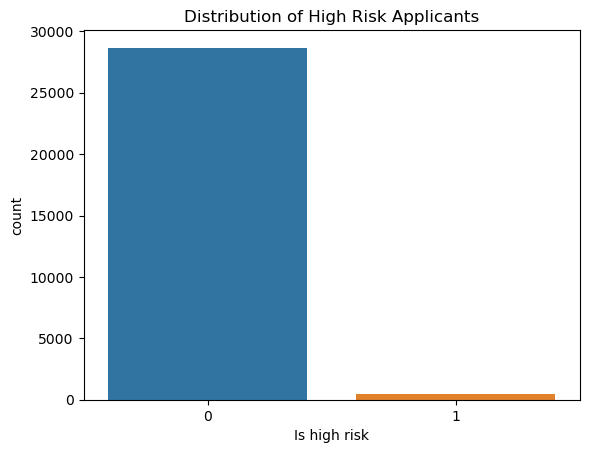

In [5]:
sns.countplot(x='Is high risk', data=train_df)
plt.title('Distribution of High Risk Applicants')
plt.show()

#### Univariate Analysis

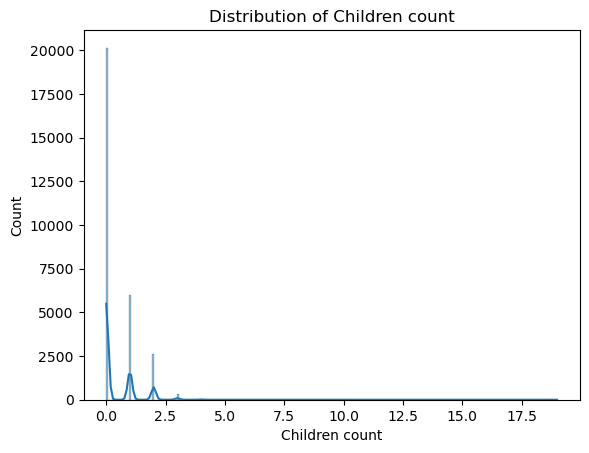

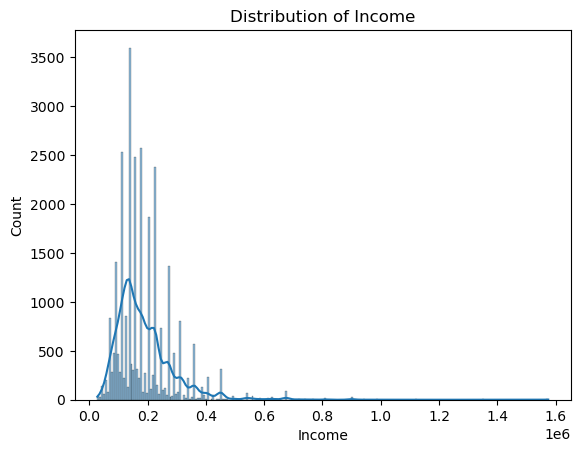

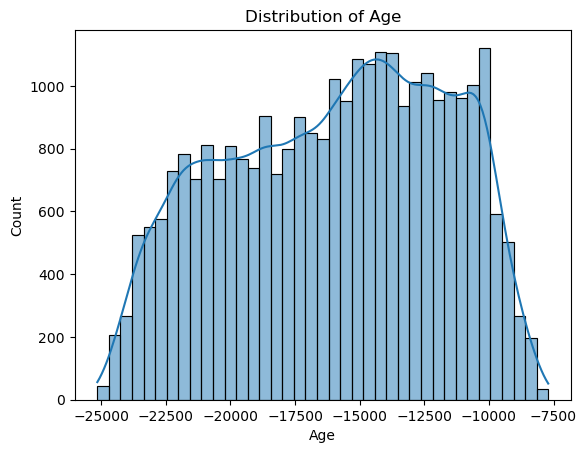

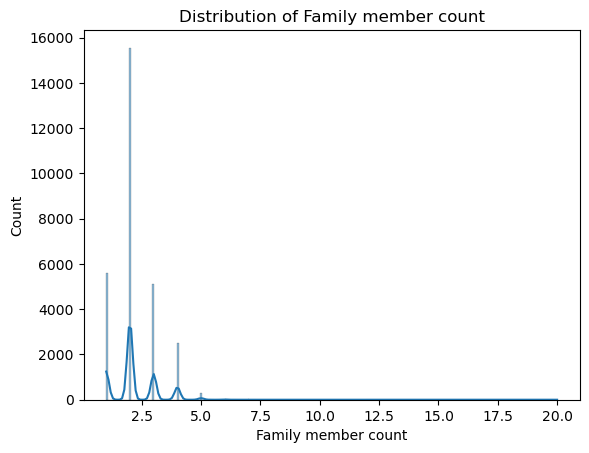

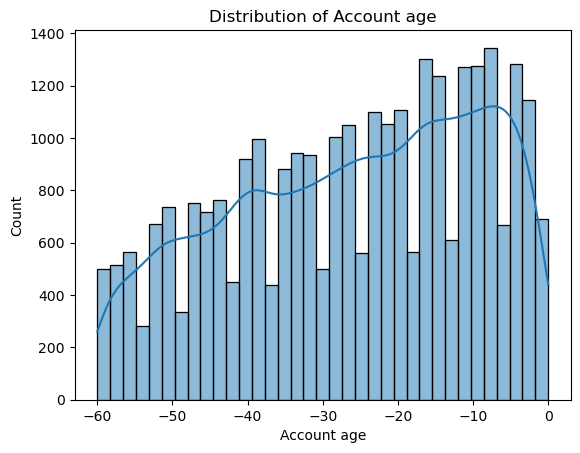

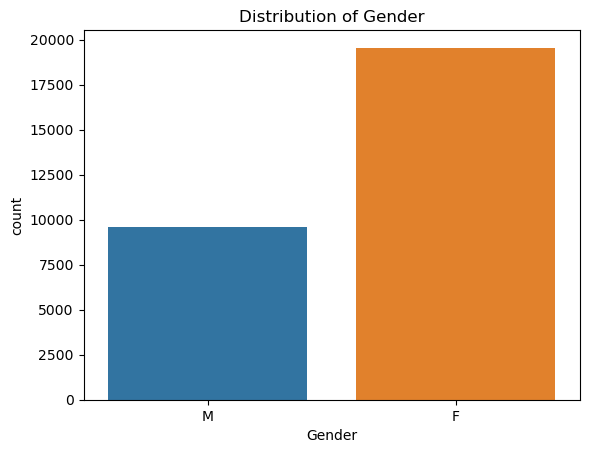

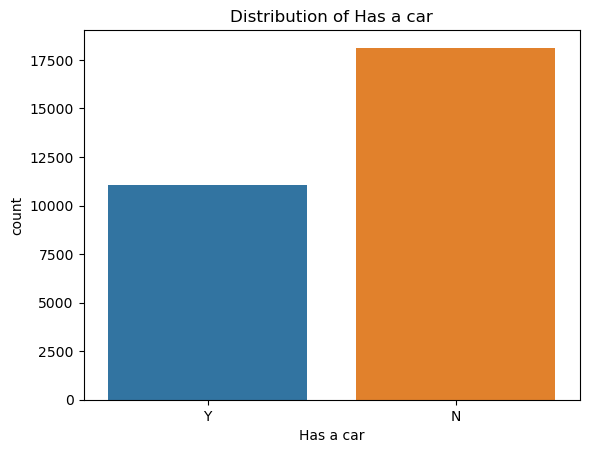

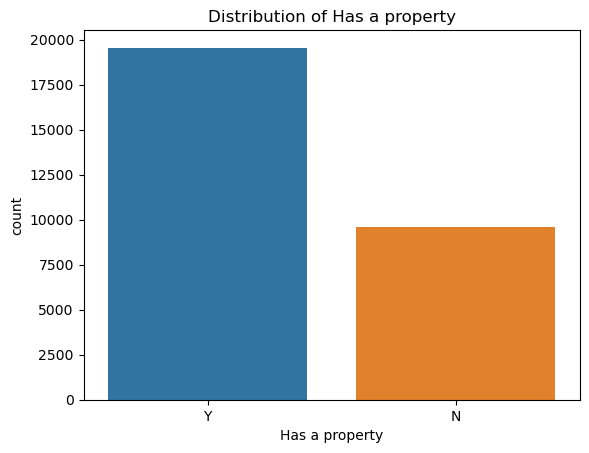

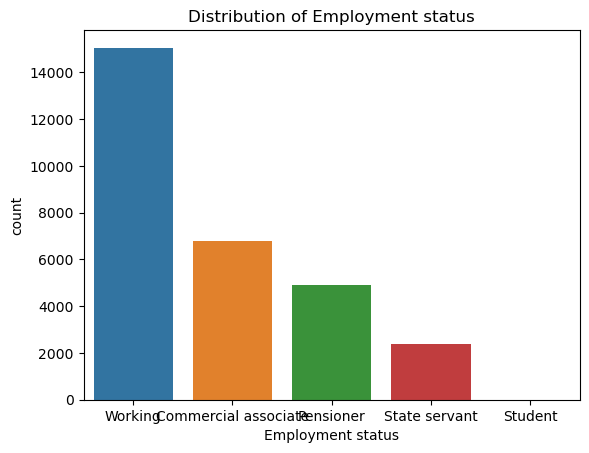

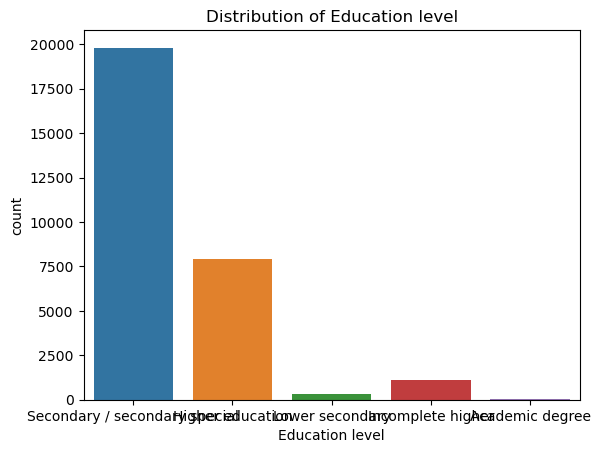

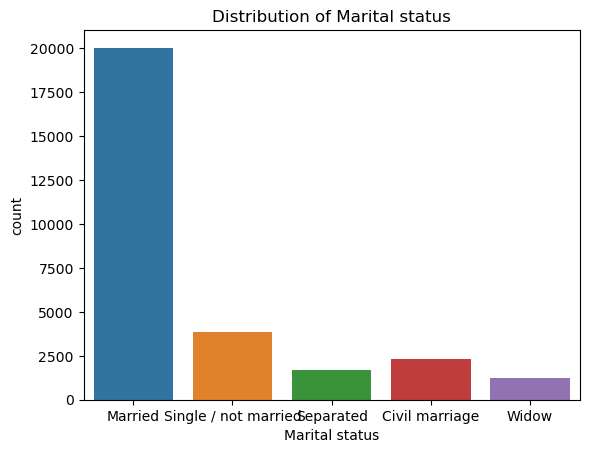

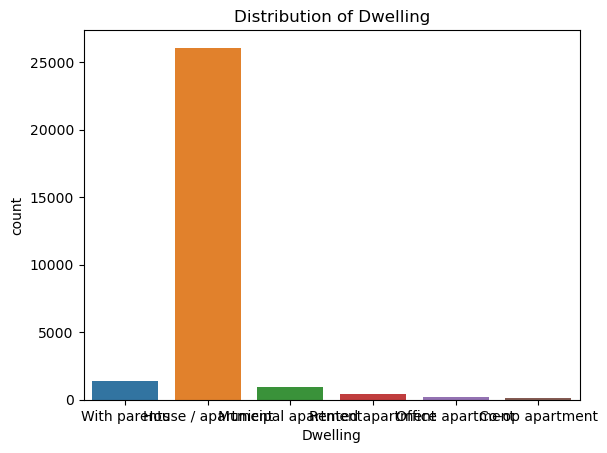

In [6]:
numerical_cols = ['Children count', 'Income', 'Age', 'Family member count', 'Account age']
for col in numerical_cols:
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

categorical_cols = ['Gender', 'Has a car', 'Has a property', 'Employment status', 'Education level', 'Marital status', 'Dwelling']
for col in categorical_cols:
    sns.countplot(x=col, data=train_df)
    plt.title(f'Distribution of {col}')
    plt.show()

#### Bi-Variate Analysis

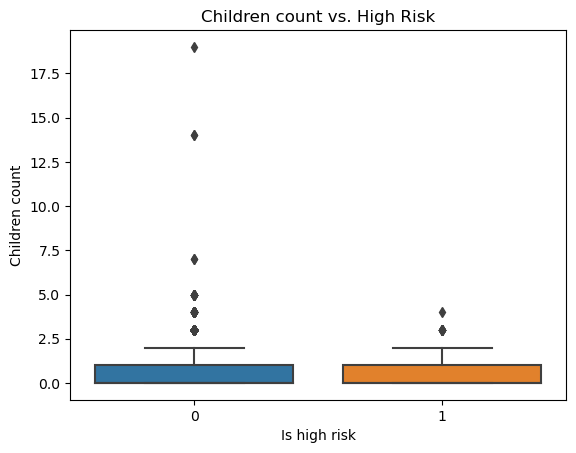

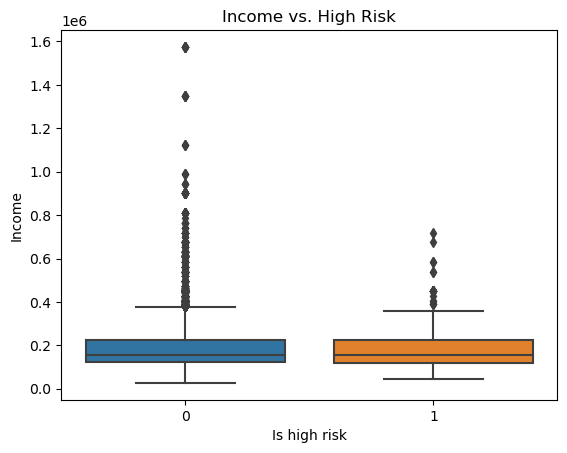

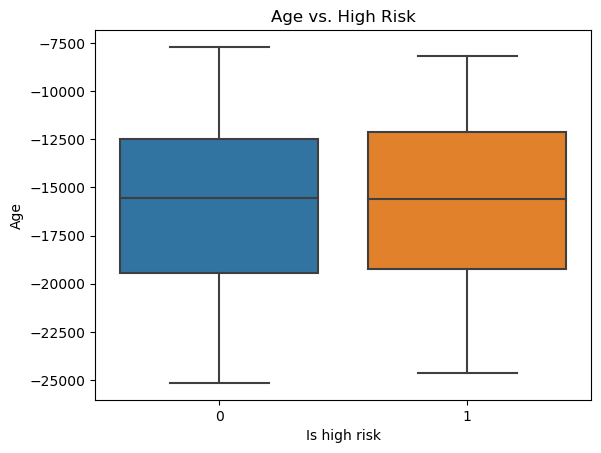

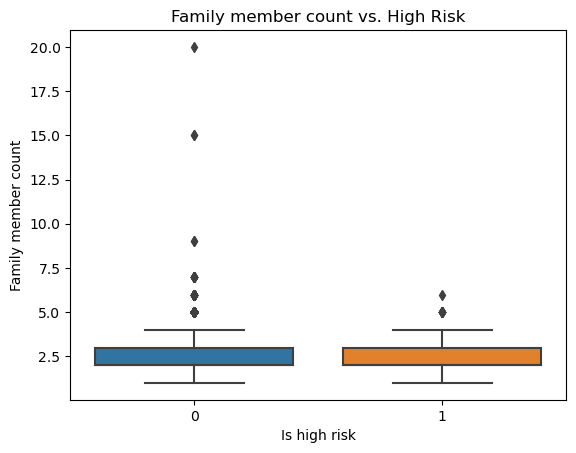

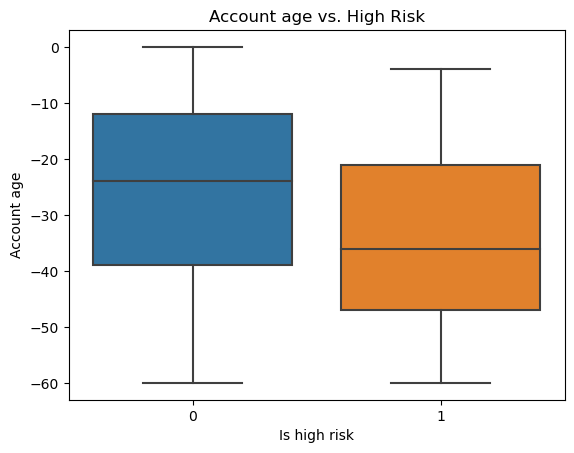

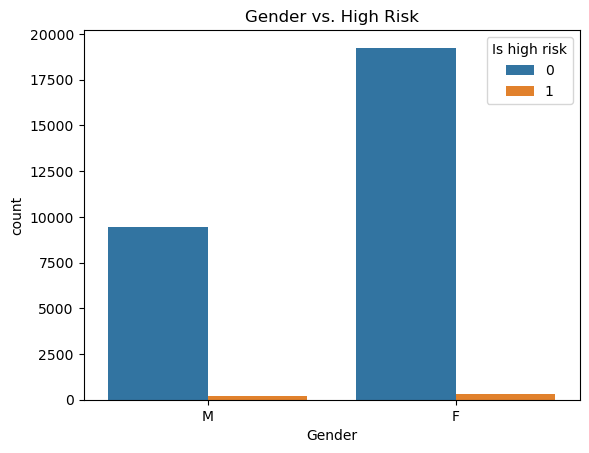

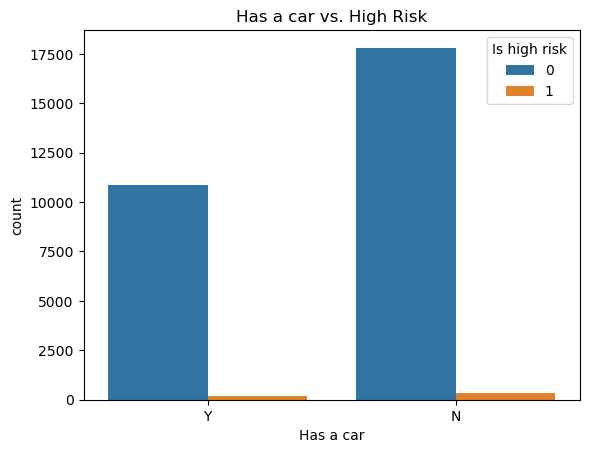

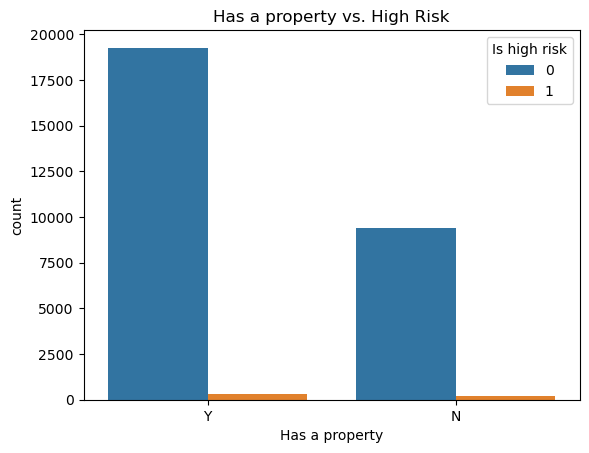

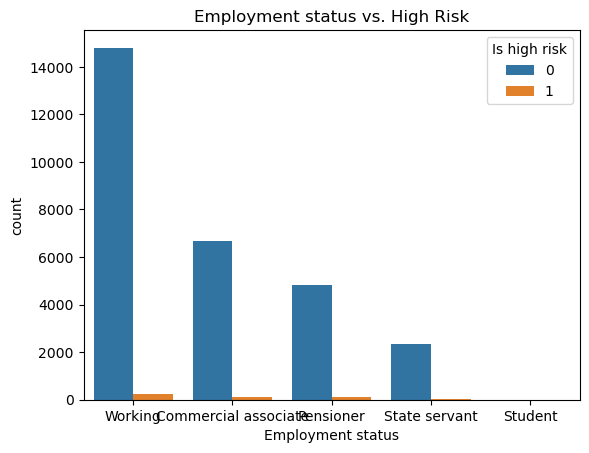

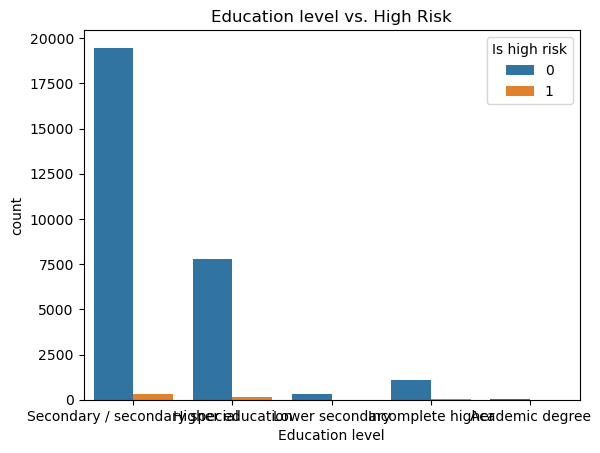

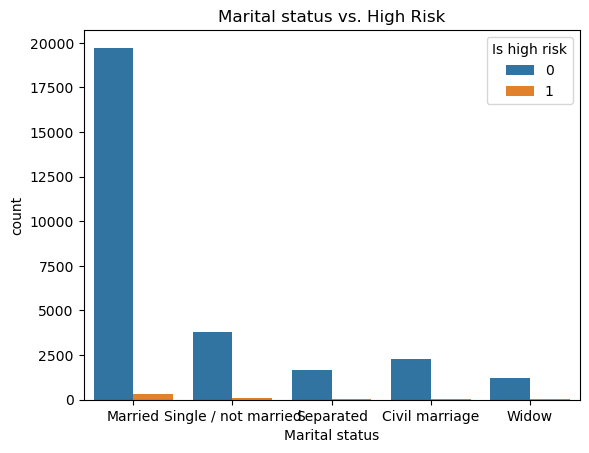

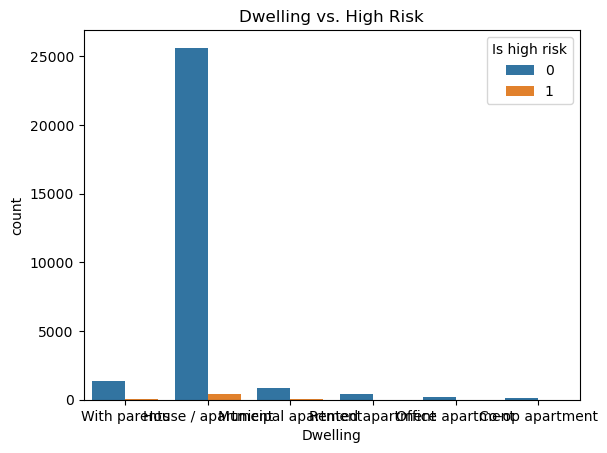

In [7]:
for col in numerical_cols:
    sns.boxplot(x='Is high risk', y=col, data=train_df)
    plt.title(f'{col} vs. High Risk')
    plt.show()

for col in categorical_cols:
    sns.countplot(x=col, hue='Is high risk', data=train_df)
    plt.title(f'{col} vs. High Risk')
    plt.show()

### Data Preprocessing

#### Handle missing values for numerical columns

In [8]:
numerical_cols_to_fill = ['Children count', 'Income', 'Age', 'Family member count', 'Account age']
train_df[numerical_cols_to_fill] = train_df[numerical_cols_to_fill].fillna(train_df[numerical_cols_to_fill].mean())
test_df[numerical_cols_to_fill] = test_df[numerical_cols_to_fill].fillna(test_df[numerical_cols_to_fill].mean())

#### Handle missing values for categorical columns

In [9]:
categorical_cols = ['Gender', 'Has a car', 'Has a property', 'Employment status', 'Education level', 'Marital status', 'Dwelling']
train_df[categorical_cols] = train_df[categorical_cols].fillna(train_df[categorical_cols].mode().iloc[0])
test_df[categorical_cols] = test_df[categorical_cols].fillna(test_df[categorical_cols].mode().iloc[0])

#### Encode categorical variables

In [10]:
label_encoder = LabelEncoder()
for col in categorical_cols:
    train_df[col] = label_encoder.fit_transform(train_df[col])

for col in categorical_cols:
    test_df[col] = label_encoder.fit_transform(test_df[col])

#### Scale or normalize features (using StandardScaler)

In [11]:
scaler = StandardScaler()
numerical_cols_to_scale = ['Children count', 'Income', 'Age', 'Family member count', 'Account age']
train_df[numerical_cols_to_scale] = scaler.fit_transform(train_df[numerical_cols_to_scale])
test_df[numerical_cols_to_scale] = scaler.fit_transform(test_df[numerical_cols_to_scale])

#### Split the dataset into features and target variable.

In [12]:
X_train = train_df.drop('Is high risk', axis=1)
y_train = train_df['Is high risk']

X_test = test_df.drop('Is high risk', axis=1)
y_test = test_df['Is high risk']

#### Save the preprocessed datasets.

In [13]:
train_df.to_csv('preprocessed_train_data.csv', index=False)
test_df.to_csv('preprocessed_test_data.csv', index=False)